# Statistical weight for Scenic GVI

In [1]:
import glob
import pandas as pd
import geopandas as gpd

In [2]:
csv_dir = 'all_original'  

In [6]:
csv_all = glob.glob(csv_dir + "/*.csv")

In [7]:
dfs = []
for csv in csv_all:
    df = pd.read_csv(csv)
    dfs.append(df)

In [8]:
all_original = pd.concat(dfs, ignore_index=True)

In [9]:
all_original

,PointID,heading,category,object,percentage of green,average depth
0,4117,0,tree,1,19.580078,10.884377
1,4117,0,tree,2,0.744629,2.723688
2,4117,180,tree,1,1.513672,3.703843
3,4117,270,tree,1,5.535889,5.937184
4,4118,0,tree,1,2.862549,6.012577
...,...,...,...,...,...,...
73138,23939,90,tree,1,5.438232,4.751135
73139,23939,90,tree,2,0.878906,3.345165
73140,23939,90,tree,3,1.550293,23.828564
73141,23939,90,shrub,1,3.161621,20.188004


In [10]:
all_original['number_of_trees'] = 0
all_original['number_of_shrubs'] = 0
all_original['number_of_grass'] = 0

In [11]:
df_grouped = all_original.groupby(['PointID', 'heading'])

In [12]:
for name, group in df_grouped:
    tree_count = group[group['category'] == 'tree'].shape[0]
    shrub_count = group[group['category'] == 'shrub'].shape[0]
    grass_count = group[group['category'] == 'grass'].shape[0] 

    all_original.loc[(all_original['PointID'] == name[0]) & (all_original['heading'] == name[1]), 'number_of_trees'] = tree_count
    all_original.loc[(all_original['PointID'] == name[0]) & (all_original['heading'] == name[1]), 'number_of_shrubs'] = shrub_count
    all_original.loc[(all_original['PointID'] == name[0]) & (all_original['heading'] == name[1]), 'number_of_grass'] = grass_count  

In [13]:
all_original.head()

,PointID,heading,category,object,percentage of green,average depth,number_of_trees,number_of_shrubs,number_of_grass
0,4117,0,tree,1,19.580078,10.884377,2,0,0
1,4117,0,tree,2,0.744629,2.723688,2,0,0
2,4117,180,tree,1,1.513672,3.703843,1,0,0
3,4117,270,tree,1,5.535889,5.937184,1,0,0
4,4118,0,tree,1,2.862549,6.012577,2,0,0


In [14]:
all_original.shape

(73143, 9)

In [15]:
all_original['tree_percent'] = 0
all_original['grass_percent'] = 0
all_original['shrub_percent'] = 0

In [17]:
def calculate_percent(group):
    tree_percent = group[group['category'] == 'tree']['percentage of green'].sum()
    grass_percent = group[group['category'] == 'grass']['percentage of green'].sum()
    shrub_percent = group[group['category'] == 'shrub']['percentage of green'].sum()

    group['tree_percent'] = tree_percent
    group['grass_percent'] = grass_percent
    group['shrub_percent'] = shrub_percent

    return group

In [18]:
# apply function
all_original = all_original.groupby(['PointID', 'heading']).apply(calculate_percent)

C:\Users\win10\AppData\Local\Temp\ipykernel_18952\2314984869.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  all_original = all_original.groupby(['PointID', 'heading']).apply(calculate_percent)


In [19]:
all_original.head(20)

,PointID,heading,category,object,percentage of green,average depth,number_of_trees,number_of_shrubs,number_of_grass,tree_percent,grass_percent,shrub_percent
0,4117,0,tree,1,19.580078,10.884377,2,0,0,20.324707,0.0,0.000000
1,4117,0,tree,2,0.744629,2.723688,2,0,0,20.324707,0.0,0.000000
2,4117,180,tree,1,1.513672,3.703843,1,0,0,1.513672,0.0,0.000000
3,4117,270,tree,1,5.535889,5.937184,1,0,0,5.535889,0.0,0.000000
4,4118,0,tree,1,2.862549,6.012577,2,0,0,5.279541,0.0,0.000000
5,4118,0,tree,2,2.416992,3.936234,2,0,0,5.279541,0.0,0.000000
6,4118,180,tree,1,7.305908,7.600993,1,0,0,7.305908,0.0,0.000000
7,4118,270,tree,1,6.591797,5.548695,2,0,0,8.514404,0.0,0.000000
8,4118,270,tree,2,1.922607,2.639782,2,0,0,8.514404,0.0,0.000000
9,4118,90,tree,1,1.824951,8.908904,1,0,0,1.824951,0.0,0.000000


In [20]:
all_original.shape

(73143, 12)

In [21]:
image_GVI = all_original.drop_duplicates(subset=['PointID', 'heading'])

In [22]:
image_GVI.shape

(30062, 12)

In [23]:
image_GVI.head()

,PointID,heading,category,object,percentage of green,average depth,number_of_trees,number_of_shrubs,number_of_grass,tree_percent,grass_percent,shrub_percent
0,4117,0,tree,1,19.580078,10.884377,2,0,0,20.324707,0.0,0.0
2,4117,180,tree,1,1.513672,3.703843,1,0,0,1.513672,0.0,0.0
3,4117,270,tree,1,5.535889,5.937184,1,0,0,5.535889,0.0,0.0
4,4118,0,tree,1,2.862549,6.012577,2,0,0,5.279541,0.0,0.0
6,4118,180,tree,1,7.305908,7.600993,1,0,0,7.305908,0.0,0.0


In [24]:
columns_to_drop = ['category', 'object', 'percentage of green', 'average depth']

image_GVI = image_GVI.drop(columns=columns_to_drop)

In [25]:
image_GVI.head()

,PointID,heading,number_of_trees,number_of_shrubs,number_of_grass,tree_percent,grass_percent,shrub_percent
0,4117,0,2,0,0,20.324707,0.0,0.0
2,4117,180,1,0,0,1.513672,0.0,0.0
3,4117,270,1,0,0,5.535889,0.0,0.0
4,4118,0,2,0,0,5.279541,0.0,0.0
6,4118,180,1,0,0,7.305908,0.0,0.0


# Add scenic scores

In [26]:
scores=pd.read_csv('image_scores.csv')

In [27]:
scores

,Borough,Image,Score
0,City_of_London,GoogleSV_City_of_London_0_0,4.824893
1,City_of_London,GoogleSV_City_of_London_0_180,4.078924
2,City_of_London,GoogleSV_City_of_London_0_270,2.968327
3,City_of_London,GoogleSV_City_of_London_0_90,4.129668
4,City_of_London,GoogleSV_City_of_London_10_0,2.307268
...,...,...,...
34231,Westminster,GoogleSV_Westminster_23938_90,2.834680
34232,Westminster,GoogleSV_Westminster_23939_0,2.029601
34233,Westminster,GoogleSV_Westminster_23939_180,2.390487
34234,Westminster,GoogleSV_Westminster_23939_270,2.259508


In [28]:
scores[['ImageName','ID','Heading']] = scores['Image'].str.rsplit('_', n=2, expand=True)

In [29]:
scores['ID'] = scores['ID'].astype(int)
scores['Heading'] = scores['Heading'].astype(int)

In [30]:
scores.head(20)

,Borough,Image,Score,ImageName,ID,Heading
0,City_of_London,GoogleSV_City_of_London_0_0,4.824893,GoogleSV_City_of_London,0,0
1,City_of_London,GoogleSV_City_of_London_0_180,4.078924,GoogleSV_City_of_London,0,180
2,City_of_London,GoogleSV_City_of_London_0_270,2.968327,GoogleSV_City_of_London,0,270
3,City_of_London,GoogleSV_City_of_London_0_90,4.129668,GoogleSV_City_of_London,0,90
4,City_of_London,GoogleSV_City_of_London_10_0,2.307268,GoogleSV_City_of_London,10,0
5,City_of_London,GoogleSV_City_of_London_10_180,3.595226,GoogleSV_City_of_London,10,180
6,City_of_London,GoogleSV_City_of_London_10_270,2.584038,GoogleSV_City_of_London,10,270
7,City_of_London,GoogleSV_City_of_London_10_90,3.746971,GoogleSV_City_of_London,10,90
8,City_of_London,GoogleSV_City_of_London_11_0,2.427883,GoogleSV_City_of_London,11,0
9,City_of_London,GoogleSV_City_of_London_11_180,1.936130,GoogleSV_City_of_London,11,180


In [31]:
scenic_data = pd.merge(image_GVI, scores, how='inner', left_on=['PointID', 'heading'], right_on = ['ID', 'Heading'])

In [32]:
scenic_data.shape

(30062, 14)

In [33]:
scenic_data.head()

,PointID,heading,number_of_trees,number_of_shrubs,number_of_grass,tree_percent,grass_percent,shrub_percent,Borough,Image,Score,ImageName,ID,Heading
0,4117,0,2,0,0,20.324707,0.0,0.0,Camden,GoogleSV_Camden_4117_0,3.079726,GoogleSV_Camden,4117,0
1,4117,180,1,0,0,1.513672,0.0,0.0,Camden,GoogleSV_Camden_4117_180,2.631819,GoogleSV_Camden,4117,180
2,4117,270,1,0,0,5.535889,0.0,0.0,Camden,GoogleSV_Camden_4117_270,2.636710,GoogleSV_Camden,4117,270
3,4118,0,2,0,0,5.279541,0.0,0.0,Camden,GoogleSV_Camden_4118_0,2.632754,GoogleSV_Camden,4118,0
4,4118,180,1,0,0,7.305908,0.0,0.0,Camden,GoogleSV_Camden_4118_180,3.777743,GoogleSV_Camden,4118,180


In [34]:
import statsmodels.api as sm

C:\Users\win10\.conda\envs\yyjj125\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [35]:
X = scenic_data[['tree_percent', 'grass_percent', 'shrub_percent']]
y = scenic_data['Score']

In [36]:
X = sm.add_constant(X)

In [37]:
model = sm.OLS(y, X)

In [38]:
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2446.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:05:30   Log-Likelihood:                -32571.
No. Observations:               30062   AIC:                         6.515e+04
Df Residuals:                   30058   BIC:                         6.518e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5355      0.006    409.919

In [39]:
weight_tree = 0.0263
weight_grass = 0.0156
weight_shrub = 0.0216

In [40]:
coef_sum = weight_tree + weight_grass + weight_shrub

In [41]:
weight_tree_norm = weight_tree / coef_sum
weight_grass_norm = weight_grass / coef_sum
weight_shrub_norm = weight_shrub / coef_sum

In [42]:
print('tree:', weight_tree_norm)
print('grass:', weight_grass_norm)
print('shrub:', weight_shrub_norm)

tree: 0.4141732283464567
grass: 0.24566929133858267
shrub: 0.3401574803149606


# SGVI

In [43]:
scenic_data['Scenic_GVI'] = weight_tree_norm * scenic_data['tree_percent'] + weight_grass_norm * scenic_data['grass_percent'] + weight_shrub_norm * scenic_data['shrub_percent']

# CGVI

In [44]:
scenic_data['Constant_GVI'] = 0.55 * scenic_data['tree_percent'] + 0.2 * scenic_data['grass_percent'] + 0.25 * scenic_data['shrub_percent']

# OGVI

In [45]:
scenic_data['Original_GVI'] = scenic_data['tree_percent'] + scenic_data['grass_percent'] + scenic_data['shrub_percent']

In [46]:
scenic_data.head()

,PointID,heading,number_of_trees,number_of_shrubs,number_of_grass,tree_percent,grass_percent,shrub_percent,Borough,Image,Score,ImageName,ID,Heading,Scenic_GVI,Constant_GVI,Original_GVI
0,4117,0,2,0,0,20.324707,0.0,0.0,Camden,GoogleSV_Camden_4117_0,3.079726,GoogleSV_Camden,4117,0,8.417950,11.178589,20.324707
1,4117,180,1,0,0,1.513672,0.0,0.0,Camden,GoogleSV_Camden_4117_180,2.631819,GoogleSV_Camden,4117,180,0.626922,0.832520,1.513672
2,4117,270,1,0,0,5.535889,0.0,0.0,Camden,GoogleSV_Camden_4117_270,2.636710,GoogleSV_Camden,4117,270,2.292817,3.044739,5.535889
3,4118,0,2,0,0,5.279541,0.0,0.0,Camden,GoogleSV_Camden_4118_0,2.632754,GoogleSV_Camden,4118,0,2.186645,2.903748,5.279541
4,4118,180,1,0,0,7.305908,0.0,0.0,Camden,GoogleSV_Camden_4118_180,3.777743,GoogleSV_Camden,4118,180,3.025912,4.018250,7.305908


In [47]:
avg_GVIs = scenic_data.groupby('PointID')[['Scenic_GVI', 'Constant_GVI', 'Original_GVI']].mean().reset_index()

In [48]:
avg_GVIs

,PointID,Scenic_GVI,Constant_GVI,Original_GVI
0,0,11.493650,14.555868,28.377279
1,1,0.716663,0.951691,1.730347
2,2,0.928756,0.978902,2.467855
3,3,0.391826,0.520325,0.946045
4,4,0.192121,0.255127,0.463867
...,...,...,...,...
8400,24130,6.890273,9.133911,16.650391
8401,24131,1.294522,1.682943,3.157552
8402,24132,10.702724,13.942719,26.080322
8403,24133,3.142638,4.140015,7.617188


In [49]:
avg_GVIs.to_csv("avg_GVIs.csv", index=False)

In [50]:
# check the data
avg_GVIs[avg_GVIs['PointID'] == 13725]

,PointID,Scenic_GVI,Constant_GVI,Original_GVI
3013,13725,6.507518,8.374786,15.948486


# Sampling map

In [51]:
no_images=pd.read_csv('no_image.csv')

In [52]:
no_images.shape

(216, 1)

In [53]:
total=pd.read_csv('all_sample_points.csv')

In [54]:
total.shape

(24135, 12)

In [55]:
remove = no_images['Index'].tolist()
sample=total[~total.index.isin(remove)]

In [56]:
sample.shape

(23919, 12)

In [57]:
sample.head()

,PointID,lat,lon,index_LSOA,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM
0,0,51.515956,-0.095641,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London
1,1,51.517674,-0.096428,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London
2,2,51.515767,-0.095506,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London
3,3,51.520192,-0.097410,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London
4,4,51.517899,-0.097043,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London


In [58]:
boroughs = ["City of London","Camden", "Greenwich", "Hackney", "Hammersmith and Fulham", 
            "Islington", "Kensington and Chelsea", "Lambeth", "Lewisham",
            "Southwark", "Tower Hamlets", "Wandsworth", "Westminster"]

In [59]:
sample_boroughs = sample[sample['LAD11NM'].isin(boroughs)]

In [60]:
result2=sample_boroughs.groupby('LAD11NM')['LSOA11CD'].nunique()
result2

LAD11NM
Camden                    133
City of London              6
Greenwich                 151
Hackney                   144
Hammersmith and Fulham    113
Islington                 123
Kensington and Chelsea    102
Lambeth                   178
Lewisham                  169
Southwark                 166
Tower Hamlets             144
Wandsworth                179
Westminster               128
Name: LSOA11CD, dtype: int64

In [61]:
before_sample = pd.read_csv('before_smaple.csv')

In [62]:
geometry = gpd.points_from_xy(before_sample['lon'], before_sample['lat'])
gdf = gpd.GeoDataFrame(before_sample, geometry=geometry)

gdf

,lat,lon,geometry
0,51.448904,-0.191496,POINT (-0.19150 51.44890)
1,51.431733,0.016274,POINT (0.01627 51.43173)
2,51.494720,0.116618,POINT (0.11662 51.49472)
3,51.337493,-0.108552,POINT (-0.10855 51.33749)
4,51.441404,0.083061,POINT (0.08306 51.44140)
...,...,...,...
259377,51.353020,-0.151948,POINT (-0.15195 51.35302)
259378,51.502053,-0.080973,POINT (-0.08097 51.50205)
259379,51.548211,-0.146055,POINT (-0.14606 51.54821)
259380,51.383382,0.117686,POINT (0.11769 51.38338)


In [63]:
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=3857)

In [65]:
gdf2=gpd.read_file('ESRI/LSOA_2011_London_gen_MHW.shp')

In [66]:
gdf2 = gdf2.to_crs(epsg=3857)

In [67]:
InnerLondon = gdf2[gdf2['LAD11NM'].isin(boroughs)]

In [68]:
InnerLondon_point = gpd.sjoin(gdf, InnerLondon, how="inner", op='intersects')

C:\Users\win10\.conda\envs\yyjj125\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [69]:
sample_innerlondon = sample[sample['LAD11NM'].isin(boroughs)]

In [70]:
geometry2 = gpd.points_from_xy(sample_innerlondon['lon'], sample_innerlondon['lat'])
gdf_sample = gpd.GeoDataFrame(sample_innerlondon, geometry=geometry2)

In [71]:
gdf_sample = gdf_sample.set_crs(epsg=4326)
gdf_sample = gdf_sample.to_crs(epsg=3857)

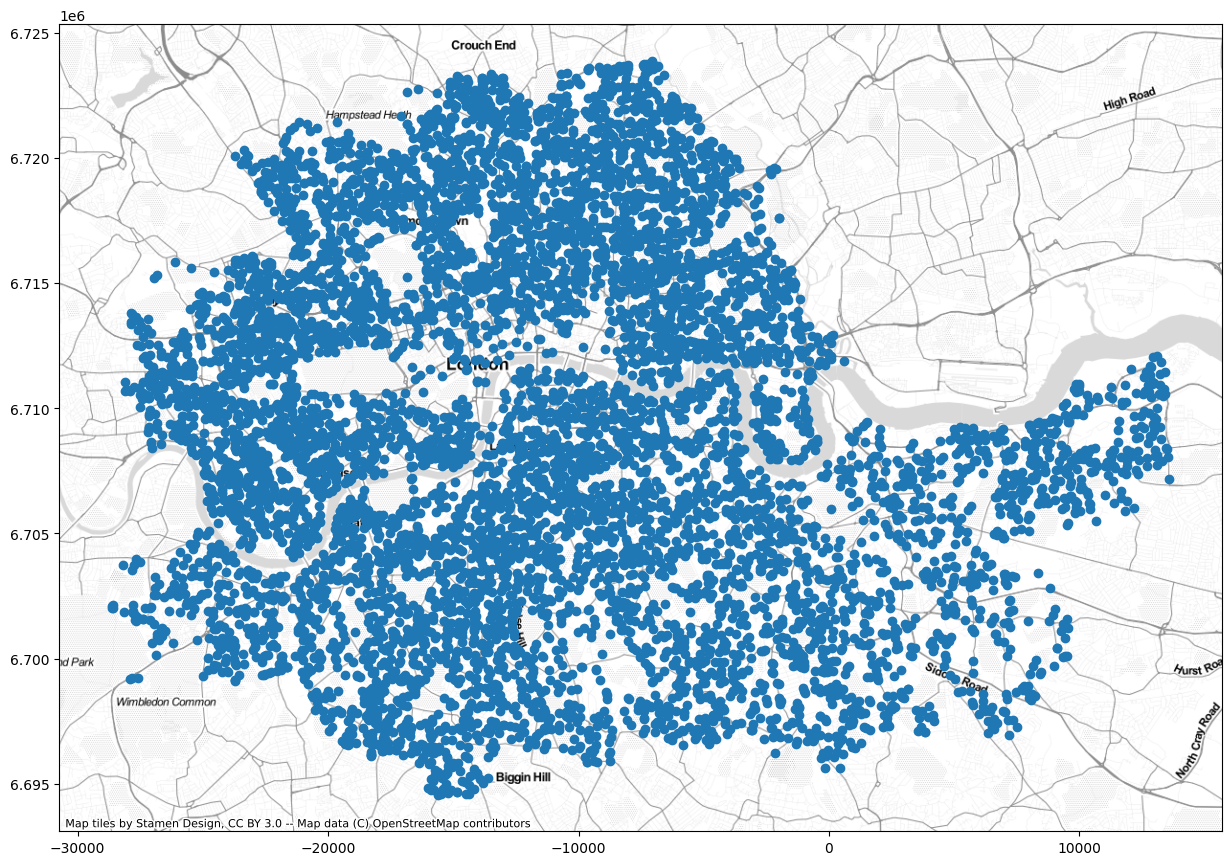

In [74]:
import contextily as cx
ax = gdf_sample.plot(figsize=(15,15))
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite ,crs=gdf.crs.to_string())

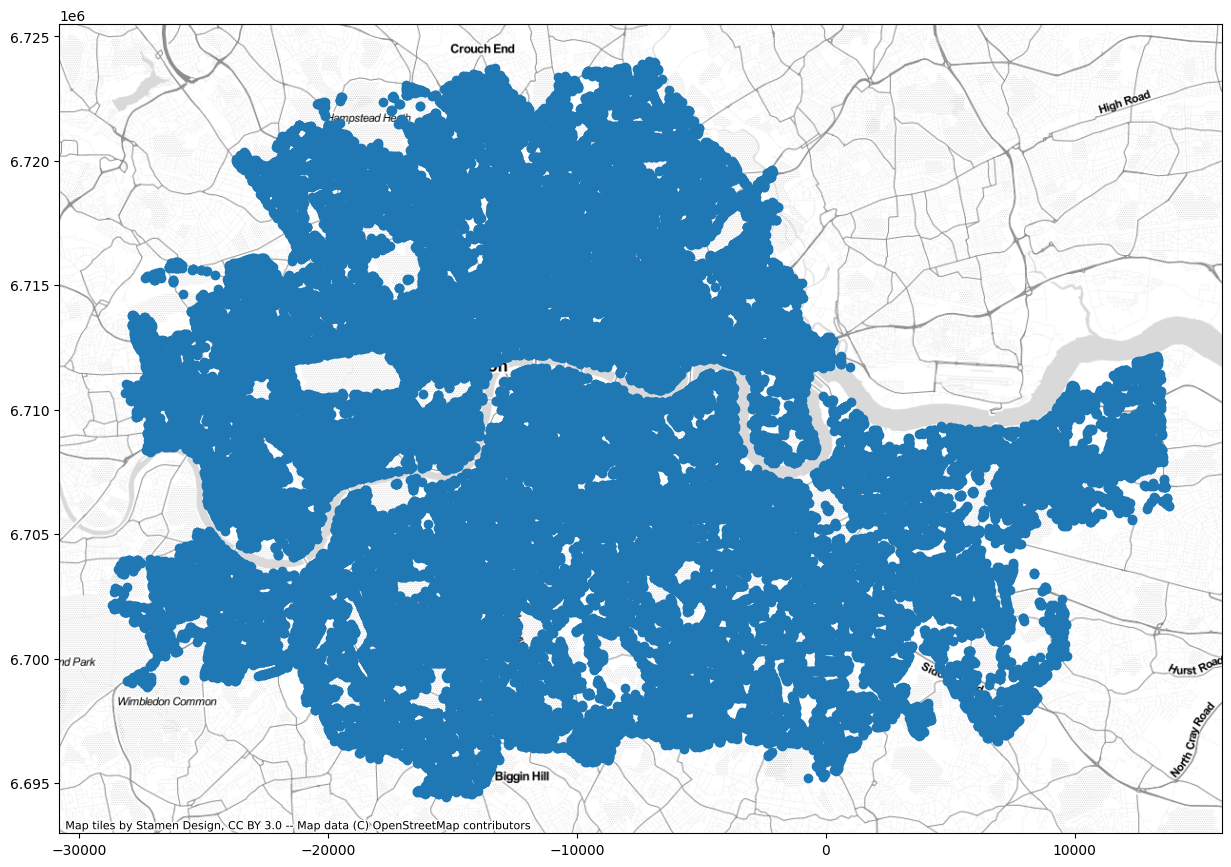

In [76]:
import contextily as cx
ax = InnerLondon_point.plot(figsize=(15,15))
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite, crs=gdf.crs.to_string())

# calculate the average GVI in lsoa

In [75]:
GVIs=pd.read_csv('avg_GVIs.csv')

In [77]:
GVIs

,PointID,Scenic_GVI,Constant_GVI,Original_GVI
0,0,11.493650,14.555868,28.377279
1,1,0.716663,0.951691,1.730347
2,2,0.928756,0.978902,2.467855
3,3,0.391826,0.520325,0.946045
4,4,0.192121,0.255127,0.463867
...,...,...,...,...
8400,24130,6.890273,9.133911,16.650391
8401,24131,1.294522,1.682943,3.157552
8402,24132,10.702724,13.942719,26.080322
8403,24133,3.142638,4.140015,7.617188


In [78]:
merged_GVI = sample_innerlondon.merge(GVIs, on='PointID')

In [79]:
merged_GVI

,PointID,lat,lon,index_LSOA,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,geometry,Scenic_GVI,Constant_GVI,Original_GVI
0,0,51.515956,-0.095641,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,POINT (-0.09564 51.51596),11.493650,14.555868,28.377279
1,1,51.517674,-0.096428,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,POINT (-0.09643 51.51767),0.716663,0.951691,1.730347
2,2,51.515767,-0.095506,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,POINT (-0.09551 51.51577),0.928756,0.978902,2.467855
3,3,51.520192,-0.097410,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,POINT (-0.09741 51.52019),0.391826,0.520325,0.946045
4,4,51.517899,-0.097043,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,POINT (-0.09704 51.51790),0.192121,0.255127,0.463867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,24130,51.474378,-0.013933,4834,E01033746,Greenwich 038E,E02006931,Greenwich 038,E09000011,Greenwich,E12000007,London,POINT (-0.01393 51.47438),6.890273,9.133911,16.650391
8401,24131,51.474041,-0.011340,4834,E01033746,Greenwich 038E,E02006931,Greenwich 038,E09000011,Greenwich,E12000007,London,POINT (-0.01134 51.47404),1.294522,1.682943,3.157552
8402,24132,51.476282,-0.013850,4834,E01033746,Greenwich 038E,E02006931,Greenwich 038,E09000011,Greenwich,E12000007,London,POINT (-0.01385 51.47628),10.702724,13.942719,26.080322
8403,24133,51.473442,-0.013688,4834,E01033746,Greenwich 038E,E02006931,Greenwich 038,E09000011,Greenwich,E12000007,London,POINT (-0.01369 51.47344),3.142638,4.140015,7.617188


In [80]:
mean_GVI = merged_GVI.groupby('LSOA11CD')[['Scenic_GVI', 'Constant_GVI', 'Original_GVI']].mean().reset_index()
mean_GVI.head()

,LSOA11CD,Scenic_GVI,Constant_GVI,Original_GVI
0,E01000001,2.744604,3.452382,6.797078
1,E01000002,0.964048,1.187622,2.409668
2,E01000003,0.345481,0.458781,0.834147
3,E01000005,3.117605,3.993774,7.656860
4,E01000842,4.367032,5.634705,10.689697


In [81]:
InnerLondon_GVI = gdf2.merge(mean_GVI, on='LSOA11CD')
InnerLondon_GVI.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Scenic_GVI,Constant_GVI,Original_GVI
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((-10827.247 6714078.770, -10741.191 6...",2.744604,3.452382,6.797078
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((-9807.601 6713691.188, -9936.978 671...",0.964048,1.187622,2.409668
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((-10771.256 6714377.993, -10736.168 6...",0.345481,0.458781,0.834147
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((-8149.129 6712008.170, -8405.274 671...",3.117605,3.993774,7.656860
4,E01000842,Camden 011A,E02000176,Camden 011,E09000007,Camden,E12000007,London,1444,1368,76,137.3,724,1.9,"POLYGON ((-18394.018 6718681.008, -18332.522 6...",4.367032,5.634705,10.689697


# Street NDVI

In [82]:
from rasterstats import zonal_stats
import rasterio
from rasterio.mask import mask

In [83]:
import osmnx as ox
import networkx as nx

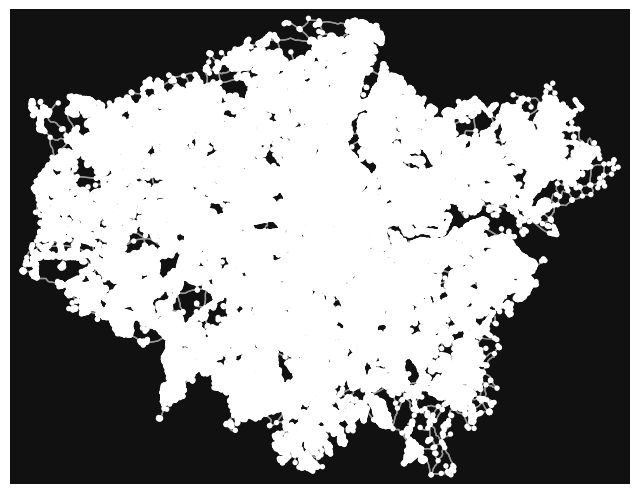

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [96]:
G1 = ox.graph_from_place('London, UK', network_type='drive')
G2 = ox.graph_from_place('City of London, UK', network_type='drive')

G_all = nx.compose(G1, G2)

ox.plot_graph(G_all)

In [119]:
edges = ox.graph_to_gdfs(G_all, nodes=False, edges=True)

In [120]:
edges = edges.to_crs(epsg=3857) 

In [121]:
# 20-meter buffer
edges['geometry'] = edges.geometry.buffer(20)

In [122]:
intersect = gpd.overlay(edges, InnerLondon, how='intersection')

In [124]:
with rasterio.open('ESRI/NDVI.tif') as src:
    intersect = intersect.to_crs(src.crs)   
    geoms = [geometry.__geo_interface__ for geometry in intersect.geometry.values]  
    out_image, out_transform = mask(src, geoms, crop=True)
    if out_image.ndim > 2:
        out_image = out_image[0]

In [125]:
zs = zonal_stats(intersect, out_image, affine=out_transform, stats=['mean'])

intersect['avg_ndvi'] = [x['mean'] for x in zs]

In [126]:
intersect = intersect.to_crs(epsg=3857)

In [127]:
intersect.columns

Index(['osmid', 'name', 'highway', 'maxspeed', 'access', 'oneway', 'reversed',
       'length', 'lanes', 'ref', 'bridge', 'junction', 'width', 'tunnel',
       'est_width', 'service', 'area', 'LSOA11CD', 'LSOA11NM', 'MSOA11CD',
       'MSOA11NM', 'LAD11CD', 'LAD11NM', 'RGN11CD', 'RGN11NM', 'USUALRES',
       'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ', 'geometry',
       'avg_ndvi'],
      dtype='object')

In [185]:
subset2 = intersect[['geometry', 'avg_ndvi']]
subset2.to_file("R_codes/R/plots/street_ndvi.shp")

In [130]:
mean_ndvi = intersect.groupby('LSOA11CD')['avg_ndvi'].mean()

In [131]:
intersect_ndvi = InnerLondon.merge(mean_ndvi, how='left', left_on='LSOA11CD', right_index=True)

# Landsurface temperature

In [134]:
intersect2 = gpd.overlay(edges, InnerLondon, how='intersection')

In [135]:
with rasterio.open('ESRI/Landsat_Temp.tif') as src:
    intersect2 = intersect2.to_crs(src.crs)
    geoms = [geometry.__geo_interface__ for geometry in intersect2.geometry.values]
    out_image, out_transform = mask(src, geoms, crop=True)
    if out_image.ndim > 2:
        out_image = out_image[0]

In [136]:
zs = zonal_stats(intersect2, out_image, affine=out_transform, stats=['mean'])
intersect2['avg_temp'] = [x['mean'] for x in zs]

In [137]:
intersect2 = intersect2.to_crs(epsg=3857)

In [183]:
subset = intersect2[['geometry', 'avg_temp']]
subset.to_file("R_codes/R/plots/street_temp.shp")

In [182]:
intersect2.head()

,osmid,name,highway,maxspeed,access,oneway,reversed,length,lanes,ref,...,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,avg_temp
0,129375498,Outer Circle,unclassified,20 mph,permissive,False,False,19.391,NaN,NaN,...,E12000007,London,1516,1475,41,31.0,715,2.1,"POLYGON ((-16208.577 6715011.914, -16208.803 6...",39.014750
1,129375498,Outer Circle,unclassified,20 mph,permissive,False,True,63.845,NaN,NaN,...,E12000007,London,1516,1475,41,31.0,715,2.1,"POLYGON ((-16251.082 6715148.792, -16250.824 6...",39.106467
2,4257258,Cambridge Terrace,residential,20 mph,permissive,True,False,102.544,NaN,NaN,...,E12000007,London,1516,1475,41,31.0,715,2.1,"POLYGON ((-16218.475 6715126.789, -16231.699 6...",39.147626
3,"[4082714, 404014015]",Outer Circle,unclassified,20 mph,permissive,False,True,827.573,2,NaN,...,E12000007,London,1516,1475,41,31.0,715,2.1,"MULTIPOLYGON (((-16513.937 6716533.435, -16515...",41.515032
4,"[8307544, 404014012, 404014013]",Gloucester Gate,unclassified,20 mph,permissive,False,False,90.114,"[2, 3]",NaN,...,E12000007,London,1516,1475,41,31.0,715,2.1,"POLYGON ((-16500.279 6716497.835, -16501.678 6...",NaN


In [139]:
mean_temp = intersect2.groupby('LSOA11CD')['avg_temp'].mean()

In [140]:
intersect_temp = InnerLondon.merge(mean_temp, how='left', left_on='LSOA11CD', right_index=True)

# DWGVI （Depth weighted GVI）

In [143]:
all_original

,PointID,heading,category,object,percentage of green,average depth,number_of_trees,number_of_shrubs,number_of_grass,tree_percent,grass_percent,shrub_percent
0,4117,0,tree,1,19.580078,10.884377,2,0,0,20.324707,0.0,0.000000
1,4117,0,tree,2,0.744629,2.723688,2,0,0,20.324707,0.0,0.000000
2,4117,180,tree,1,1.513672,3.703843,1,0,0,1.513672,0.0,0.000000
3,4117,270,tree,1,5.535889,5.937184,1,0,0,5.535889,0.0,0.000000
4,4118,0,tree,1,2.862549,6.012577,2,0,0,5.279541,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
73138,23939,90,tree,1,5.438232,4.751135,3,2,0,7.867432,0.0,3.942871
73139,23939,90,tree,2,0.878906,3.345165,3,2,0,7.867432,0.0,3.942871
73140,23939,90,tree,3,1.550293,23.828564,3,2,0,7.867432,0.0,3.942871
73141,23939,90,shrub,1,3.161621,20.188004,3,2,0,7.867432,0.0,3.942871


In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

all_original['normalized_depth'] = scaler.fit_transform(all_original[['average depth']])

In [145]:
all_original

,PointID,heading,category,object,percentage of green,average depth,number_of_trees,number_of_shrubs,number_of_grass,tree_percent,grass_percent,shrub_percent,normalized_depth
0,4117,0,tree,1,19.580078,10.884377,2,0,0,20.324707,0.0,0.000000,0.152497
1,4117,0,tree,2,0.744629,2.723688,2,0,0,20.324707,0.0,0.000000,0.038161
2,4117,180,tree,1,1.513672,3.703843,1,0,0,1.513672,0.0,0.000000,0.051893
3,4117,270,tree,1,5.535889,5.937184,1,0,0,5.535889,0.0,0.000000,0.083184
4,4118,0,tree,1,2.862549,6.012577,2,0,0,5.279541,0.0,0.000000,0.084240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73138,23939,90,tree,1,5.438232,4.751135,3,2,0,7.867432,0.0,3.942871,0.066566
73139,23939,90,tree,2,0.878906,3.345165,3,2,0,7.867432,0.0,3.942871,0.046868
73140,23939,90,tree,3,1.550293,23.828564,3,2,0,7.867432,0.0,3.942871,0.333853
73141,23939,90,shrub,1,3.161621,20.188004,3,2,0,7.867432,0.0,3.942871,0.282846


In [146]:
all_original['weighted_percent'] = all_original['percentage of green'] * all_original['normalized_depth']

In [147]:
all_original

,PointID,heading,category,object,percentage of green,average depth,number_of_trees,number_of_shrubs,number_of_grass,tree_percent,grass_percent,shrub_percent,normalized_depth,weighted_percent
0,4117,0,tree,1,19.580078,10.884377,2,0,0,20.324707,0.0,0.000000,0.152497,2.985899
1,4117,0,tree,2,0.744629,2.723688,2,0,0,20.324707,0.0,0.000000,0.038161,0.028415
2,4117,180,tree,1,1.513672,3.703843,1,0,0,1.513672,0.0,0.000000,0.051893,0.078549
3,4117,270,tree,1,5.535889,5.937184,1,0,0,5.535889,0.0,0.000000,0.083184,0.460495
4,4118,0,tree,1,2.862549,6.012577,2,0,0,5.279541,0.0,0.000000,0.084240,0.241141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73138,23939,90,tree,1,5.438232,4.751135,3,2,0,7.867432,0.0,3.942871,0.066566,0.362003
73139,23939,90,tree,2,0.878906,3.345165,3,2,0,7.867432,0.0,3.942871,0.046868,0.041192
73140,23939,90,tree,3,1.550293,23.828564,3,2,0,7.867432,0.0,3.942871,0.333853,0.517570
73141,23939,90,shrub,1,3.161621,20.188004,3,2,0,7.867432,0.0,3.942871,0.282846,0.894253


In [148]:
DWGVI = all_original.groupby('PointID').agg({'weighted_percent':'sum', 'heading':'nunique'})

DWGVI['DWGVI'] = DWGVI['weighted_percent'] / DWGVI['heading']

In [149]:
DWGVI

,weighted_percent,heading,DWGVI
PointID,,,
0,14.308232,3,4.769411
1,0.130778,2,0.065389
2,1.387780,3,0.462593
3,0.085684,1,0.085684
4,0.024719,1,0.024719
...,...,...,...
24130,9.936782,4,2.484196
24131,0.665978,3,0.221993
24132,17.708688,4,4.427172


In [150]:
merged_DWGVI = sample_innerlondon.merge(DWGVI, on='PointID')

In [151]:
mean_DWGVI = merged_DWGVI.groupby('LSOA11CD')['DWGVI'].mean().reset_index()
mean_DWGVI.head()

,LSOA11CD,DWGVI
0,E01000001,1.081559
1,E01000002,0.240196
2,E01000003,0.094253
3,E01000005,0.854578
4,E01000842,1.784359


In [152]:
InnerLondon_DWGVI = gdf2.merge(mean_DWGVI, on='LSOA11CD')
InnerLondon_DWGVI.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,DWGVI
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((-10827.247 6714078.770, -10741.191 6...",1.081559
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((-9807.601 6713691.188, -9936.978 671...",0.240196
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((-10771.256 6714377.993, -10736.168 6...",0.094253
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((-8149.129 6712008.170, -8405.274 671...",0.854578
4,E01000842,Camden 011A,E02000176,Camden 011,E09000007,Camden,E12000007,London,1444,1368,76,137.3,724,1.9,"POLYGON ((-18394.018 6718681.008, -18332.522 6...",1.784359


In [160]:
InnerLondon_all_GVI = InnerLondon_DWGVI.merge(mean_GVI, on='LSOA11CD')

In [161]:
InnerLondon_all_GVI = InnerLondon_all_GVI.merge(mean_ndvi, on='LSOA11CD')

In [162]:
InnerLondon_all_GVI = InnerLondon_all_GVI.merge(mean_temp, on='LSOA11CD')

In [164]:
InnerLondon_all_GVI.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,POPDEN,HHOLDS,AVHHOLDSZ,geometry,DWGVI,Scenic_GVI,Constant_GVI,Original_GVI,avg_ndvi,avg_temp
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,112.9,876,1.7,"POLYGON ((-10827.247 6714078.770, -10741.191 6...",1.081559,2.744604,3.452382,6.797078,0.147762,38.389786
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,62.9,830,1.7,"POLYGON ((-9807.601 6713691.188, -9936.978 671...",0.240196,0.964048,1.187622,2.409668,0.156848,37.449299
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,227.7,817,1.5,"POLYGON ((-10771.256 6714377.993, -10736.168 6...",0.094253,0.345481,0.458781,0.834147,0.197733,38.341492
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,52.0,467,2.1,"POLYGON ((-8149.129 6712008.170, -8405.274 671...",0.854578,3.117605,3.993774,7.656860,0.138421,38.593716
4,E01000842,Camden 011A,E02000176,Camden 011,E09000007,Camden,E12000007,London,1444,1368,...,137.3,724,1.9,"POLYGON ((-18394.018 6718681.008, -18332.522 6...",1.784359,4.367032,5.634705,10.689697,0.337357,40.609043


In [165]:
InnerLondon_all_GVI.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry', 'DWGVI', 'Scenic_GVI',
       'Constant_GVI', 'Original_GVI', 'avg_ndvi', 'avg_temp'],
      dtype='object')

In [166]:
InnerLondon_all_GVI.shape

(1736, 21)

In [167]:
InnerLondon_all_GVI.tail()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,POPDEN,HHOLDS,AVHHOLDSZ,geometry,DWGVI,Scenic_GVI,Constant_GVI,Original_GVI,avg_ndvi,avg_temp
1731,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,...,107.6,581,2.3,"POLYGON ((9176.134 6710015.489, 9370.214 67098...",2.707067,6.002144,7.625824,14.902954,0.341701,38.959399
1732,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,...,20.4,663,3.1,"POLYGON ((12338.436 6711972.215, 12501.244 671...",2.173362,3.697524,3.858765,11.042175,0.277459,41.577228
1733,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,...,125.8,646,2.7,"POLYGON ((8988.738 6709413.713, 9091.842 67093...",1.653834,4.235985,4.871475,11.048889,0.338655,40.950383
1734,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,...,32.3,591,3.1,"POLYGON ((12032.776 6710460.296, 11874.503 671...",4.134045,8.136481,9.542831,21.287231,0.339766,41.564856
1735,E01033746,Greenwich 038E,E02006931,Greenwich 038,E09000011,Greenwich,E12000007,London,1464,1436,...,115.3,715,2.0,"POLYGON ((-1354.909 6706271.000, -1375.743 670...",1.593683,4.583360,5.999888,11.142985,0.321965,40.663963


In [175]:
import pandas as pd

InnerLondon_all_GVI.to_csv('InnerLondon_all_GVI.csv', index=False)

In [176]:
InnerLondon_all_GVI.to_file("R_codes/R/plots/all_gvis.shp")

C:\Users\win10\AppData\Local\Temp\ipykernel_21276\3670405461.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  InnerLondon_all_GVI.to_file("R_codes/R/plots/all_gvis.shp")


In [84]:
# I acknowledge the use of ChatGPT 4.0 (Open AI, https://chat.openai.com) to debug.